# Etape 2 : Préparation des données pour notre algorithme de machine learning

### Après avoir catégoriser nos variables et choisi celles qui étaient pertinentes à notre modèle dans l'étape 1, on va transformer nos variables qualitatives qui ont des taux de correlations très bas pour qu'elles soient ajuster à notre modèle.

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns


df=pd.read_csv("cleared_data.csv")


# 1.One-Hot Encoding

Pour transformer nos données on va utilise le one-hot encoding , on va convertir les valeurs associées à nos variables en de nouvelles colonnes de variables et on leur assigne une valeur binaire 1 pour présent et 0 pour non existant.

On transforme les valeurs de nos variables en string puis on les transforme.

In [23]:
df.zipcode=df.zipcode.astype(str)
df.grade=df.grade.astype(str)
df.waterfront=df.waterfront.astype(str)
df.condition=df.condition.astype(str)
df.renovated=df.renovated.astype(str)
df.view=df.view.astype(str)
df=pd.get_dummies(df)

Simple nettoyage des colonnes qu'on ne veut pas.

In [24]:
df=df.drop(['zipcode_0','lat','long'],axis=1)

# 2.Scaling de nos données

#### En effet certaines de données sont beaucoup plus grandes que d'autres et on ne voudrait pas que le poids de leurs influences soient trop grandes.

## 2.1 Normalisation ou Standardisation?

On sait que si on ne connait pas notre jeu de donnée on peut utiliser la normalisation et que si nos données ont une distribution gaussienne , la standardisation est plus optimisé. Dans l'étape 1 on a utilisé des histogrammes pour comprendre la distribution de nos variables et ainsi les nettoyer, ici nous allons observer la distribution de nos variables avec un diagramme de densité c'est un module de matplotlib qui permet d'obtenir une version lissé et continue d'un histogramme pour mieux la visualiser.

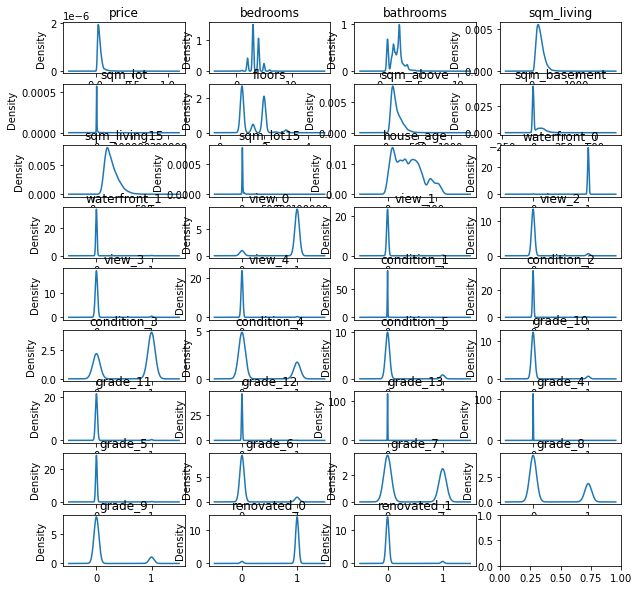

In [25]:
fig,ax = plt.subplots(9,4,figsize=(10,10))
row = col = 0
for n,c in enumerate(df.columns):
    if (n%4 == 0) & (n > 0):
        row += 1
        col = 0
    df[c].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
#Erreurs due au faite qu'il y'a des des colonnes qui ont des correlations parfaites.

On peut voir que la plupart de nos données ont une forme gaussienne 

#### Sélection des variables a standardiser en fonction de la variable ciblée

In [26]:
df.columns 

Index(['price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors',
       'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15', 'house_age',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'renovated_0', 'renovated_1'],
      dtype='object')

In [27]:
def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [28]:
liste = ["bedrooms","bathrooms",'sqm_living', 'sqm_lot', 'floors',
       'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15', 'house_age']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scale_data(df,liste,scaler)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,sqm_above,sqm_basement,sqm_living15,sqm_lot15,...,grade_12,grade_13,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_0,renovated_1
0,221900.0,-0.419914,-1.466915,-0.984803,-0.227848,-0.920761,-0.737945,-0.660150,-0.941310,-0.260066,...,0,0,0,0,0,1,0,0,1,0
1,538000.0,-0.419914,0.165548,0.528026,-0.189556,0.930213,0.457756,0.237813,-0.438979,-0.187296,...,0,0,0,0,0,1,0,0,0,1
2,180000.0,-1.532093,-1.466915,-1.430442,-0.123321,-0.920761,-1.231822,-0.660150,1.068015,-0.171955,...,0,0,0,0,1,0,0,0,1,0
3,604000.0,0.692266,1.145027,-0.140433,-0.243372,-0.920761,-0.893906,1.402737,-0.925612,-0.283666,...,0,0,0,0,0,1,0,0,1,0
4,510000.0,-0.419914,-0.160944,-0.445344,-0.169375,-0.920761,-0.140095,-0.660150,-0.282000,-0.192410,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21340,1007500.0,0.692266,1.798012,1.548306,-0.190591,0.930213,0.977626,1.402737,0.094748,-0.240005,...,0,0,0,0,0,0,0,1,1,0
21341,475000.0,-0.419914,0.492041,-0.844075,-0.332633,0.930213,-0.737945,-0.368919,-0.957008,-0.420158,...,0,0,0,0,0,0,1,0,1,0
21342,360000.0,-0.419914,0.492041,-0.609527,-0.336514,2.781186,-0.322049,-0.660150,-0.674446,-0.411505,...,0,0,0,0,0,0,1,0,1,0
21343,400000.0,0.692266,0.492041,0.246569,-0.223967,0.930213,0.626714,-0.660150,-0.234907,-0.203423,...,0,0,0,0,0,0,1,0,1,0


In [30]:
df.to_csv("prepared_data.csv",encoding='utf-8',index=False)